In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [50]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [51]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Terrible overall, medium ser..."
1,✅ Trip Verified | London Heathrow to Male In...
2,Not Verified | Very good flight following an ...
3,Not Verified | An hour's delay due to late ar...
4,✅ Trip Verified | I booked through BA becaus...


In [52]:
df.to_csv("BA_reviews.csv")

In [53]:
df

,reviews
0,"✅ Trip Verified | Terrible overall, medium ser..."
1,✅ Trip Verified | London Heathrow to Male In...
2,Not Verified | Very good flight following an ...
3,Not Verified | An hour's delay due to late ar...
4,✅ Trip Verified | I booked through BA becaus...
...,...
995,✅ Trip Verified | I purchased a ticket for Du...
996,✅ Trip Verified | London to Shanghai. The Con...
997,Not Verified | I have often flown British Air...
998,Not Verified | Good morning. I would like to ...


In [54]:
df = df.drop_duplicates()

In [55]:
df

,reviews
0,"✅ Trip Verified | Terrible overall, medium ser..."
1,✅ Trip Verified | London Heathrow to Male In...
2,Not Verified | Very good flight following an ...
3,Not Verified | An hour's delay due to late ar...
4,✅ Trip Verified | I booked through BA becaus...
...,...
995,✅ Trip Verified | I purchased a ticket for Du...
996,✅ Trip Verified | London to Shanghai. The Con...
997,Not Verified | I have often flown British Air...
998,Not Verified | Good morning. I would like to ...


In [56]:
df = df.dropna(subset=['reviews'])

In [12]:
df

,reviews
0,"✅ Trip Verified | Terrible overall, medium ser..."
1,✅ Trip Verified | London Heathrow to Male In...
2,Not Verified | Very good flight following an ...
3,Not Verified | An hour's delay due to late ar...
4,✅ Trip Verified | I booked through BA becaus...
...,...
995,✅ Trip Verified | I purchased a ticket for Du...
996,✅ Trip Verified | London to Shanghai. The Con...
997,Not Verified | I have often flown British Air...
998,Not Verified | Good morning. I would like to ...


In [60]:
df[['Verified_Status', 'Review_Text']] = df['reviews'].str.split('|', n=1,expand=True)
# Trim whitespace
df['Verified_Status'] = df['Verified_Status'].str.strip()
df['Review_Text'] = df['Review_Text'].str.strip()


In [61]:
df

,reviews,Verified_Status,Review_Text
0,"✅ Trip Verified | Terrible overall, medium ser...",✅ Trip Verified,"Terrible overall, medium service and the fligh..."
1,✅ Trip Verified | London Heathrow to Male In...,✅ Trip Verified,London Heathrow to Male In new business class....
2,Not Verified | Very good flight following an ...,Not Verified,Very good flight following an equally good fli...
3,Not Verified | An hour's delay due to late ar...,Not Verified,An hour's delay due to late arrival of the inc...
4,✅ Trip Verified | I booked through BA becaus...,✅ Trip Verified,I booked through BA because Loganair don’t hav...
...,...,...,...
995,✅ Trip Verified | I purchased a ticket for Du...,✅ Trip Verified,I purchased a ticket for Dublin to Mauritius o...
996,✅ Trip Verified | London to Shanghai. The Con...,✅ Trip Verified,London to Shanghai. The Concorde room in Heath...
997,Not Verified | I have often flown British Air...,Not Verified,I have often flown British Airways and have co...
998,Not Verified | Good morning. I would like to ...,Not Verified,Good morning. I would like to write a review f...


In [62]:
df.drop(columns=['reviews'], inplace=True)

In [63]:
df

,Verified_Status,Review_Text
0,✅ Trip Verified,"Terrible overall, medium service and the fligh..."
1,✅ Trip Verified,London Heathrow to Male In new business class....
2,Not Verified,Very good flight following an equally good fli...
3,Not Verified,An hour's delay due to late arrival of the inc...
4,✅ Trip Verified,I booked through BA because Loganair don’t hav...
...,...,...
995,✅ Trip Verified,I purchased a ticket for Dublin to Mauritius o...
996,✅ Trip Verified,London to Shanghai. The Concorde room in Heath...
997,Not Verified,I have often flown British Airways and have co...
998,Not Verified,Good morning. I would like to write a review f...


In [66]:
df['Verified_Status'] = df['Verified_Status'].str.replace('✅', '', regex=True).str.strip()

In [67]:
df['Verified_Status'].value_counts()

Verified_Status
Trip Verified    739
Not Verified     260
cNot Verified      1
Name: count, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Verified_Status  1000 non-null   object
 1   Review_Text      1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [68]:
df

,Verified_Status,Review_Text
0,Trip Verified,"Terrible overall, medium service and the fligh..."
1,Trip Verified,London Heathrow to Male In new business class....
2,Not Verified,Very good flight following an equally good fli...
3,Not Verified,An hour's delay due to late arrival of the inc...
4,Trip Verified,I booked through BA because Loganair don’t hav...
...,...,...
995,Trip Verified,I purchased a ticket for Dublin to Mauritius o...
996,Trip Verified,London to Shanghai. The Concorde room in Heath...
997,Not Verified,I have often flown British Airways and have co...
998,Not Verified,Good morning. I would like to write a review f...


In [74]:
df.to_csv('cleaned_reviews.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\argka\AppData\Roaming\nltk_data...


Review Verification Count:
 Verified_Status
Trip Verified    739
Not Verified     260
cNot Verified      1
Name: count, dtype: int64


C:\Users\argka\AppData\Local\Temp\ipykernel_23080\930686375.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verified_counts.index, y=verified_counts.values, palette="Blues_r")


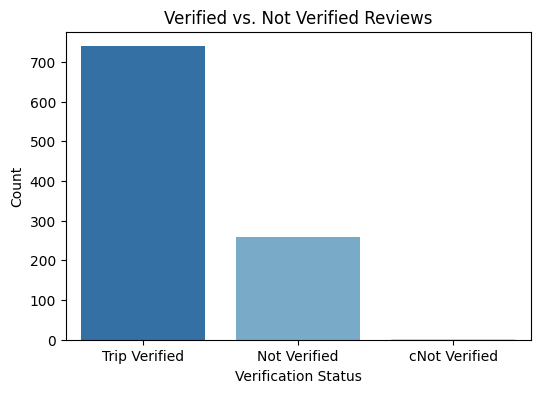


Sentiment Distribution:
 Sentiment
Negative    522
Positive    462
Neutral      16
Name: count, dtype: int64


C:\Users\argka\AppData\Local\Temp\ipykernel_23080\930686375.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


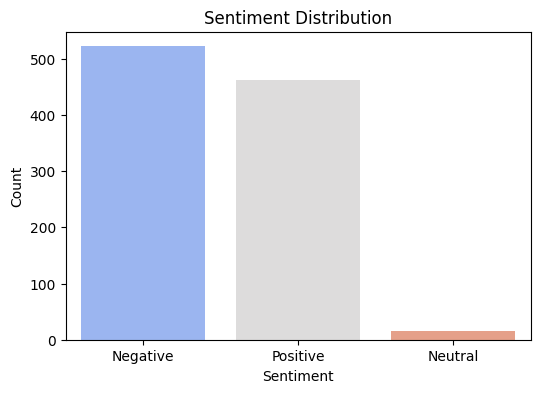


Most Common Words:
 [('the', 7451), ('to', 5564), ('and', 4611), ('a', 3345), ('was', 3249), ('i', 3172), ('of', 2110), ('in', 2044), ('on', 1797), ('for', 1774), ('flight', 1566), ('with', 1405), ('we', 1400), ('my', 1388), ('that', 1265), ('not', 1216), ('they', 1193), ('is', 1142), ('at', 1124), ('ba', 1107)]


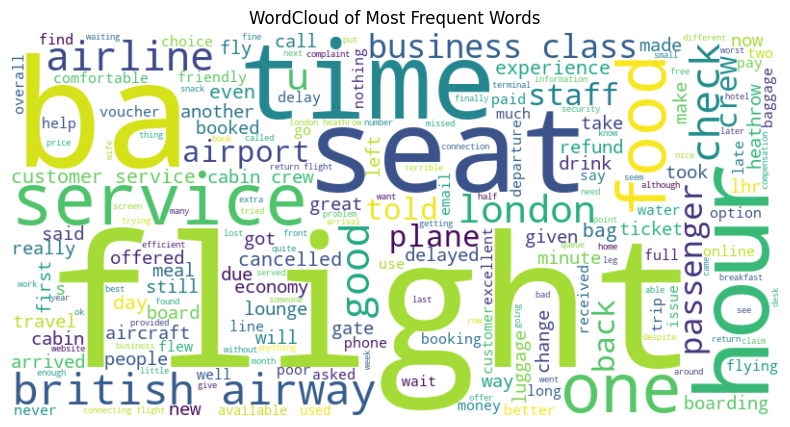

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter

# Download NLTK resources
nltk.download('vader_lexicon')

# Load cleaned dataset
df = pd.read_csv('cleaned_reviews.csv')

### 1️⃣ Basic Statistics ###
# Count of Verified vs Not Verified reviews
verified_counts = df['Verified_Status'].value_counts()
print("Review Verification Count:\n", verified_counts)

# Plot verification status distribution
plt.figure(figsize=(6,4))
sns.barplot(x=verified_counts.index, y=verified_counts.values, palette="Blues_r")
plt.title("Verified vs. Not Verified Reviews")
plt.xlabel("Verification Status")
plt.ylabel("Count")
plt.show()

### 2️⃣ Sentiment Analysis ###
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df['Sentiment'] = df['Review_Text'].apply(get_sentiment)

# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### 3️⃣ Word Frequency Analysis ###
# Tokenize words and count frequency
all_words = ' '.join(df['Review_Text'].dropna()).lower().split()
word_freq = Counter(all_words)

# Most common words
common_words = word_freq.most_common(20)
print("\nMost Common Words:\n", common_words)

# WordCloud visualization
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Most Frequent Words")
plt.show()


In [73]:
!pip install nltk


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.5 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 401.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.5 MB 4.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 4.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 5.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/274.1 kB ? eta -:--:--
   ---------------------------------- ----- 235.5/274.1 kB 7.3 MB/s eta 0:00:01
   ----------------

In [76]:
!pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 487.6 kB/s eta 0:00:01
   ---------------- ----------------------- 122.9/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 2.1 MB/s eta 0:00:00
